<a href="https://colab.research.google.com/github/mikulicmateo/StockPrediction/blob/main/StockPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import json
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, BatchNormalization
from keras.layers.core import Dense, Dropout
from keras.regularizers import l2
from matplotlib import pyplot
from datetime import datetime

def create_model():
    l_model = Sequential()
    l_model.add(Input(32))
    l_model.add(Dense(64, activation="relu"))
    l_model.add(BatchNormalization())
    l_model.add(Dense(128, activation="relu"))
    l_model.add(Dropout(0.5))
    l_model.add(Dense(128, activation="softplus"))
    l_model.add(Dense(128, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation="relu"))
    l_model.add(Dense(64, activation="relu"))
    l_model.add(Dense(64, activation="softplus"))
    l_model.add(Dropout(0.5))
    l_model.add(Dense(32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation="relu"))
    l_model.add(Dense(16, activation="relu"))
    l_model.add(Dense(8, activation="softplus"))
    l_model.add(Dense(4, activation="linear"))
    l_model.add(Dense(2, activation="linear"))
    l_model.add(Dense(1, activation="softplus"))
    l_model.compile(Adam(learning_rate=0.0001), loss="msle", metrics=["mse", "mae", "msle"])
    return l_model


def calculate_typical_price(row):
    typical_price = (row[1] + row[2] + row[3])/3
    return typical_price


In [2]:
def load_from_dictionary(dataset):
  arr = []
  list_train = []
  list_valid = []
  list_test = []
  for j in dataset.keys():
    data_train = np.empty(shape=(0, 8))
    data_valid = np.empty(shape=(0, 8))
    data_test = np.empty(shape=(0, 8))
    for i in dataset[j]:
        date_string = i.get('date')
        arr = float(i.get('open')), float(i.get('high')), float(i.get('low')), float(i.get('close')), \
              float(i.get('volume')), float(i.get('rsi')), float(i.get('sma')), float(i.get('ema'))
        if date_string < "2018-01-01":
          data_train = np.append(data_train, [arr], axis=0)
        elif date_string < "2020-01-01":
          data_valid = np.append(data_valid, [arr], axis=0)
        else:
          data_test = np.append(data_test, [arr], axis=0)
    print(data_train.shape)
    if data_train.size:
      list_train.append(data_train)
    if data_valid.size:
      list_valid.append(data_valid)
    if data_test.size:
      list_test.append(data_test)
  
  return list_train, list_valid, list_test


In [3]:
def to_np_arr_for_N_days(listOfArrays):
  input_data = np.empty((0,32))
  output_data = np.empty((0,))
  for company in listOfArrays:
    num_rows, _ = company.shape
    for i in range(num_rows):
        if i + 4 > num_rows-1:
            print(company[i])
            break
        add = np.array([company[i+4], company[i + 3], company[i + 2], company[i + 1]]).reshape(1,32)
        input_data=np.append(input_data, add, axis=0)
        add = np.array([calculate_typical_price(company[i])])
        output_data=np.append(output_data, add, axis=0)
  
  return input_data,output_data

In [4]:
with open("/content/drive/MyDrive/dataset-extendedv3.json") as json_file:
    dataset = json.loads(json_file.read())

In [5]:
train_list, valid_list, test_list = load_from_dictionary(dataset)

(4546, 8)
(4546, 8)
(1866, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(2970, 8)
(0, 8)
(885, 8)
(3934, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(1222, 8)
(4029, 8)
(0, 8)
(4546, 8)
(0, 8)
(1494, 8)
(0, 8)
(4350, 8)
(3967, 8)
(0, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(3949, 8)
(4546, 8)
(4546, 8)
(0, 8)
(4546, 8)
(991, 8)
(4546, 8)
(4301, 8)
(0, 8)
(0, 8)
(127, 8)
(4546, 8)
(478, 8)
(0, 8)
(0, 8)
(0, 8)
(0, 8)
(0, 8)
(4546, 8)
(4546, 8)
(2211, 8)
(0, 8)
(4323, 8)
(0, 8)
(4546, 8)
(507, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(1234, 8)
(2440, 8)
(4546, 8)
(0, 8)
(0, 8)
(4546, 8)
(0, 8)
(4546, 8)
(4546, 8)
(24, 8)
(0, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(40, 8)
(4546, 8)
(917, 8)
(4546, 8)
(4546, 8)
(3381, 8)
(4420, 8)
(0, 8)
(278, 8)
(0, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(3062, 8)
(4546, 8)
(802, 8)
(1389, 8)
(0, 8)
(594, 8)
(1019, 8)
(4378, 8)
(2752, 8)
(4546, 8)
(0, 8)
(4546, 8)
(1708, 8)
(4138, 8)
(0

In [6]:
train_input, train_output = to_np_arr_for_N_days(train_list)

[1.11620e+02 1.11940e+02 1.07560e+02 1.09000e+02 1.25888e+07 5.87323e+01
 5.96682e+01 6.00730e+01]
[2.93800e+01 2.96300e+01 2.81300e+01 2.92500e+01 3.10280e+06 6.48830e+01
 1.36140e+01 1.34457e+01]
[1.99000e+01 1.99800e+01 1.94500e+01 1.96000e+01 8.12700e+05 4.08265e+01
 3.94660e+00 4.01680e+00]
[1.11400e+02 1.12000e+02 1.04400e+02 1.06700e+02 1.49290e+07 7.01830e+01
 8.27600e+01 8.31418e+01]
[1.05310e+02 1.09250e+02 9.90000e+01 1.03000e+02 5.69430e+06 6.46848e+01
 7.49300e-01 7.46500e-01]
[3.36300e+01 3.42500e+01 3.33800e+01 3.38800e+01 1.02609e+07 3.58435e+01
 1.56701e+01 1.57471e+01]
[7.16900e+01 7.26900e+01 7.08800e+01 7.14400e+01 5.28720e+06 3.64842e+01
 3.24296e+01 3.22271e+01]
[5.006000e+01 5.019000e+01 4.856000e+01 4.894000e+01 4.320687e+06
 3.488940e+01 2.190790e+01 2.188320e+01]
[2.30000e+01 2.32500e+01 2.20300e+01 2.20600e+01 8.90500e+05 3.09939e+01
 1.30380e+01 1.29099e+01]
[3.04000e+01 3.04100e+01 2.85000e+01 2.89600e+01 6.10820e+06 6.72822e+01
 2.69360e+01 2.66881e+01]
[4

In [7]:
valid_input, valid_output = to_np_arr_for_N_days(valid_list)

[1.624400e+02 1.629000e+02 1.611000e+02 1.624900e+02 5.162075e+06
 6.769410e+01 1.221667e+02 1.221998e+02]
[1.2190000e+01 1.2220000e+01 1.1660000e+01 1.1880000e+01 6.3187983e+07
 5.5733200e+01 1.0592800e+01 1.0943800e+01]
[3.166200e+02 3.172400e+02 3.120000e+02 3.165800e+02 4.578729e+06
 4.716780e+01 6.427720e+01 6.412450e+01]
[1.2175100e+03 1.2291400e+03 1.2100000e+03 1.2291400e+03 3.4301480e+06
 6.7309800e+01 1.1754208e+03 1.1758162e+03]
[1.7344000e+02 1.7537000e+02 1.7305000e+02 1.7500000e+02 2.3016177e+07
 5.7997400e+01 4.1145200e+01 4.1136800e+01]
[3.6820000e+01 3.6880000e+01 3.6610000e+01 3.6860000e+01 1.2380571e+07
 5.9799800e+01 2.9673100e+01 2.9648800e+01]
[5.739000e+01 5.739000e+01 5.659000e+01 5.699000e+01 9.482639e+06
 5.107600e+01 4.717400e+01 4.738150e+01]
[1.3060000e+01 1.3220000e+01 1.3040000e+01 1.3200000e+01 4.6055496e+07
 6.7407500e+01 1.0797700e+01 1.0785900e+01]
[1.205000e+01 1.224000e+01 1.165000e+01 1.220000e+01 1.892139e+06
 5.693030e+01 1.197320e+01 1.212720e+0

In [8]:
test_input, test_output = to_np_arr_for_N_days(test_list)

[1.336900e+02 1.349600e+02 1.334000e+02 1.341900e+02 3.267592e+06
 4.849300e+01 1.159401e+02 1.162432e+02]
[4.9350000e+01 4.9390000e+01 4.8040000e+01 4.8250000e+01 5.9935556e+07
 7.1209500e+01 4.3323200e+01 4.4070700e+01]
[4.61400e+02 4.71630e+02 4.53360e+02 4.69060e+02 1.78821e+07 7.90625e+01
 7.78037e+01 7.99919e+01]
[1.9045000e+03 1.9138900e+03 1.8920400e+03 1.9068600e+03 4.1340100e+06
 6.3847400e+01 1.8033580e+03 1.8237365e+03]
[2.9984000e+02 3.0090000e+02 2.9748000e+02 2.9839000e+02 2.7877655e+07
 7.3827400e+01 6.9004300e+01 6.9675600e+01]
[3.9120000e+01 3.9130000e+01 3.8680000e+01 3.8750000e+01 1.9083073e+07
 5.4680800e+01 3.3970400e+01 3.3936100e+01]
[9.0800000e+01 9.1120000e+01 8.9120000e+01 8.9200000e+01 1.0623821e+07
 5.4504700e+01 8.0067300e+01 7.9965600e+01]
[9.2000000e+00 9.2500000e+00 9.1200000e+00 9.2500000e+00 4.5076037e+07
 5.2399300e+01 9.0423000e+00 9.0392000e+00]
[4.251000e+01 4.281000e+01 4.143000e+01 4.161000e+01 1.127941e+06
 6.674120e+01 3.854880e+01 3.922740e+0

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit_transform(train_input)
scaler.fit_transform(valid_input)
scaler.fit_transform(test_input)

array([[0.03580929, 0.03612303, 0.03614755, ..., 0.60544056, 0.03563454,
        0.03620208],
       [0.0357906 , 0.03577715, 0.03614214, ..., 0.69003979, 0.0354294 ,
        0.03606928],
       [0.03572382, 0.03561283, 0.0360664 , ..., 0.68754331, 0.03519418,
        0.03585839],
       ...,
       [0.0124813 , 0.01262099, 0.01253248, ..., 0.68295246, 0.01190478,
        0.01196659],
       [0.01259348, 0.01256004, 0.01267856, ..., 0.64642552, 0.01183336,
        0.01190065],
       [0.01277511, 0.01274291, 0.01284086, ..., 0.60901296, 0.01177645,
        0.01185401]])

In [10]:
model = create_model()
model.summary()
history = model.fit(x=train_input, y=train_output, validation_data=(valid_input, valid_output), batch_size=32, epochs=40, verbose=1, shuffle=True)#, callbacks=EarlyStopping(monitor='loss', patience=3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2112      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                        

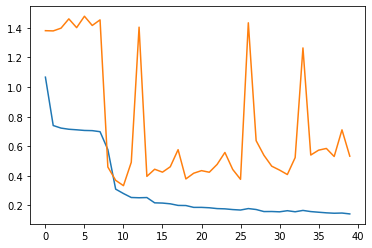

In [11]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.show()

In [12]:
results = model.evaluate(valid_input, valid_output, batch_size=32)
print("***Validation: ", results)

1659/1659 [==============================] - 4s 3ms/step - loss: 0.5331 - mse: 100722.0938 - mae: 55.4325 - msle: 0.5307
***Validation:  [0.5330826044082642, 100722.09375, 55.432525634765625, 0.5306529402732849]


In [13]:
predictions = model.predict(test_input)

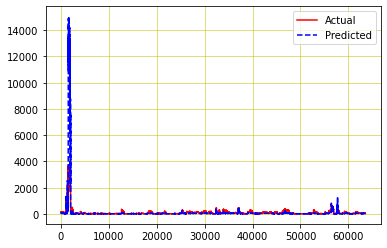

In [14]:
pyplot.plot(test_output, linestyle='solid', color='r')
pyplot.plot(predictions, linestyle='dashed', color='b')
pyplot.legend(['Actual','Predicted'], loc='best')
pyplot.grid(color = 'y', linewidth='0.5')
pyplot.show()

In [15]:
print(predictions)

[[45.38389 ]
 [45.97394 ]
 [46.93575 ]
 ...
 [35.396614]
 [32.740086]
 [31.400652]]


In [16]:
#count = 0;
#for i in predictions:
#  stri = str(i/test_output[count] * 100) + " %"
#  print(stri)
#  count += 1
#with np.printoptions(threshold=np.inf):
  #print(predictions)
#print(train_list)

(4546, 8)
[2.93800e+01 2.96300e+01 2.81300e+01 2.92500e+01 3.10280e+06 6.48830e+01
 1.36140e+01 1.34457e+01]
[1.2190000e+01 1.2220000e+01 1.1660000e+01 1.1880000e+01 6.3187983e+07
 5.5733200e+01 1.0592800e+01 1.0943800e+01]
[1.2190000e+01 1.2220000e+01 1.1660000e+01 1.1880000e+01 6.3187983e+07
 5.5733200e+01 1.0592800e+01 1.0943800e+01]


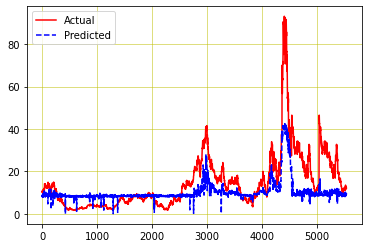

In [17]:
#Predict for AMD
with open("/content/drive/MyDrive/dataset-amd.json") as json_file:
    amd_dataset = json.loads(json_file.read())

test_list, test_list1, test_list2 = load_from_dictionary(amd_dataset)

amd_test_input, amd_test_output = to_np_arr_for_N_days(test_list)
amd_test_input1, amd_test_output1 = to_np_arr_for_N_days(test_list1)
amd_test_input2, amd_test_output2 = to_np_arr_for_N_days(test_list1)

amd_test_input = np.append(amd_test_input, amd_test_input1, axis=0)
amd_test_input = np.append(amd_test_input, amd_test_input2, axis=0)

amd_test_output = np.append(amd_test_output, amd_test_output1, axis=0)
amd_test_output = np.append(amd_test_output, amd_test_output2, axis=0)

scaler.fit_transform(amd_test_input)
amd_predictions = model.predict(amd_test_input)


pyplot.plot(amd_test_output, linestyle='solid', color='r')
pyplot.plot(amd_predictions, linestyle='dashed', color='b')
pyplot.legend(['Actual','Predicted'], loc='best')
pyplot.grid(color = 'y', linewidth='0.5')
pyplot.show()


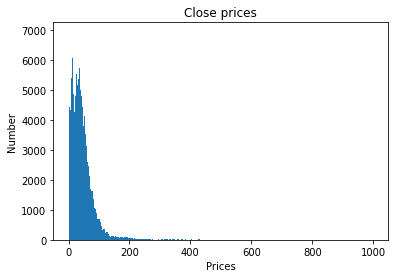

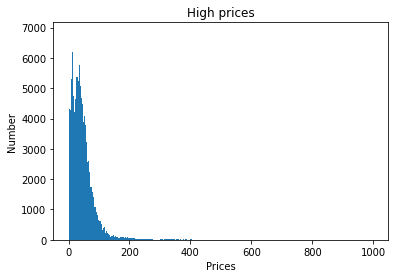

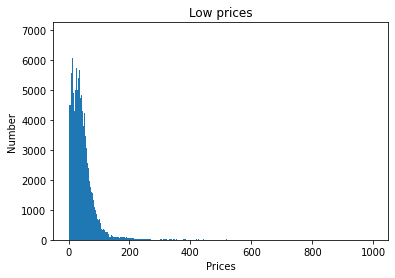

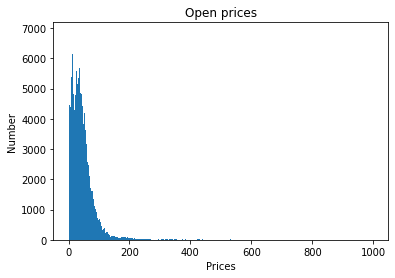

In [18]:
high_prices = []
close_prices = []
open_prices = []
low_prices = []
volume_vals = []
rsi_vals = []
sma_vals = []
ema_vals = []
bins = []
for i in range(1000):
  bins.append(i)

for i in train_list:
  for j in i:
    close_prices.append(j[0])
    high_prices.append(j[1])
    low_prices.append(j[2])
    open_prices.append(j[3])
    volume_vals.append(j[4])
    rsi_vals.append(j[5])
    sma_vals.append(j[6])
    ema_vals.append(j[7])


#print(train_list) float(i.get('volume')), float(i.get('rsi')), float(i.get('sma')), float(i.get('ema'))
#print(high_prices)
pyplot.title("Close prices")
pyplot.xlabel("Prices")
pyplot.ylabel("Number")
pyplot.hist(close_prices,bins=bins)
pyplot.show()
pyplot.title("High prices")
pyplot.xlabel("Prices")
pyplot.ylabel("Number")
pyplot.hist(high_prices,bins=bins)
pyplot.show()
pyplot.title("Low prices")
pyplot.xlabel("Prices")
pyplot.ylabel("Number")
pyplot.hist(low_prices,bins=bins)
pyplot.show()
pyplot.title("Open prices")
pyplot.xlabel("Prices")
pyplot.ylabel("Number")
pyplot.hist(open_prices,bins=bins)
pyplot.show()

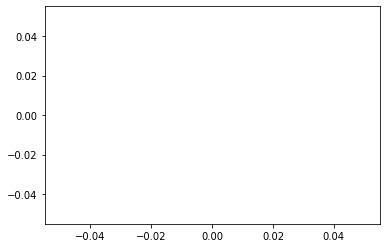

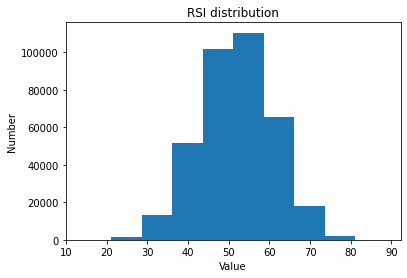

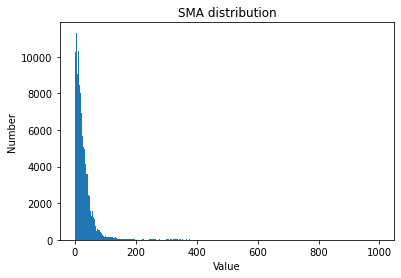

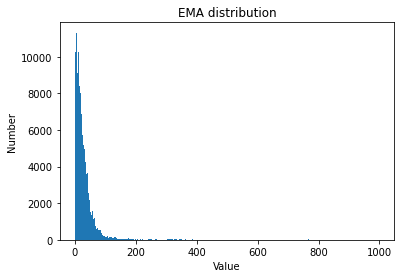

In [19]:
volume_bins = []
#for i in range():
  #volume_bins.append(i)
pyplot.hist(volume_vals,bins=volume_bins)
pyplot.show()
pyplot.title("RSI distribution")
pyplot.xlabel("Value")
pyplot.ylabel("Number")
pyplot.hist(rsi_vals)
pyplot.show()
pyplot.title("SMA distribution")
pyplot.xlabel("Value")
pyplot.ylabel("Number")
pyplot.hist(sma_vals, bins=bins)
pyplot.show()
pyplot.title("EMA distribution")
pyplot.xlabel("Value")
pyplot.ylabel("Number")
pyplot.hist(ema_vals, bins=bins)
pyplot.show()

In [20]:
from scipy.stats import pearsonr, spearmanr

pcorr, _ = pearsonr(amd_test_output, amd_predictions) #>0.5 and close to 1 high level of correlation
scorr, _ = spearmanr(amd_test_output, amd_predictions)
print("Pearson's correlation: ", pcorr)
print("Spearman's correlation: ", scorr)

Pearson's correlation:  [0.8064922765645584]
Spearman's correlation:  0.7699630996898399


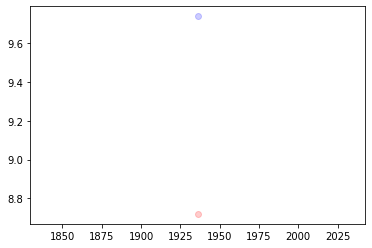

Predicted  [8.719084] , actual  9.74


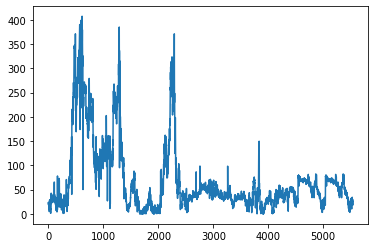

In [21]:
import random
x_max = amd_predictions.size
x = []
for i in range(x_max):
  x.append(i)

i = random.randint(0, x_max)
pyplot.scatter(x[i],amd_predictions[i], c='red', alpha=0.2)
pyplot.scatter(x[i],amd_test_output[i], c='blue', alpha=0.2)
pyplot.show()

print("Predicted ", amd_predictions[i], ", actual ", amd_test_output[i])

avg_err = []
for i in range(x_max):
  if amd_predictions[i] > amd_test_output[i]:
    avg_err.append((amd_predictions[i] - amd_test_output[i]) / amd_test_output[i] * 100)
  else:
    avg_err.append((amd_test_output[i] - amd_predictions[i]) / amd_test_output[i] * 100)

pyplot.plot(avg_err)
pyplot.show()